In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [203]:
dataset=pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [205]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [206]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [207]:
# calculating the value count of  smoker
dataset.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [208]:
# calculating the value count of region
dataset.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [209]:
dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':3,'northeast':2}},inplace=True)
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [210]:
correlation=dataset.corr()

<AxesSubplot:>

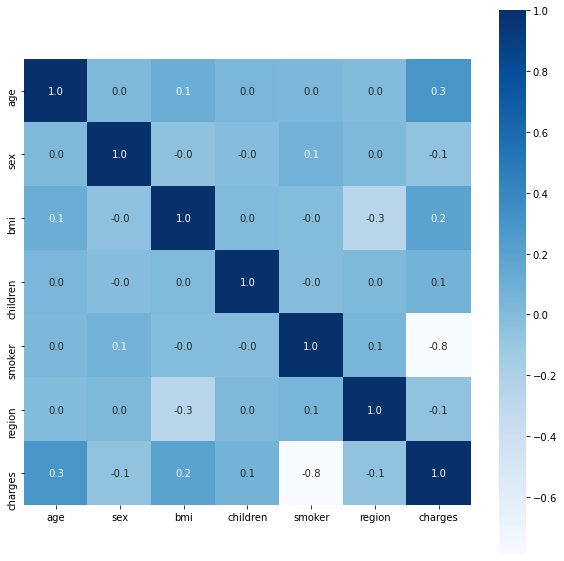

In [211]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

In [212]:
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()   
# print(dataset.iloc[:,2:3])
# dataset.iloc[:,2:3]=st_x.fit_transform(dataset.iloc[:,2:3])
# print(dataset)

In [213]:
x=dataset.drop(['charges'],axis=1)
print(x.shape)
y=dataset['charges']
print(y.shape)

(1338, 6)
(1338,)


In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)

(1070, 6)
(268, 6)


In [215]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [216]:
y_train_pred=regressor.predict(x_train)
from sklearn import metrics
error_score=metrics.r2_score(y_train,y_train_pred)
print(error_score*100)

75.1505643411174


In [217]:
y_test_pred=regressor.predict(x_test)
from sklearn import metrics
error_score=metrics.r2_score(y_test,y_test_pred)
print(error_score*100)

74.47273869684076


In [218]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestRegressor  
classifier= RandomForestRegressor(n_estimators= 24,random_state = 3)  
classifier.fit(x_train, y_train) 


# finding accuracy on training data 
y_train_pred=regressor.predict(x_train)
from sklearn import metrics
error_score=metrics.r2_score(y_train,y_train_pred)
print(error_score*100)


# finding accuracy on testing data
y_test_pred=classifier.predict(x_test)
from sklearn import metrics
error_score=metrics.r2_score(y_test,y_test_pred)
print(error_score*100)

75.1505643411174
84.06933937133104


Text(0, 0.5, 'Prediction ')

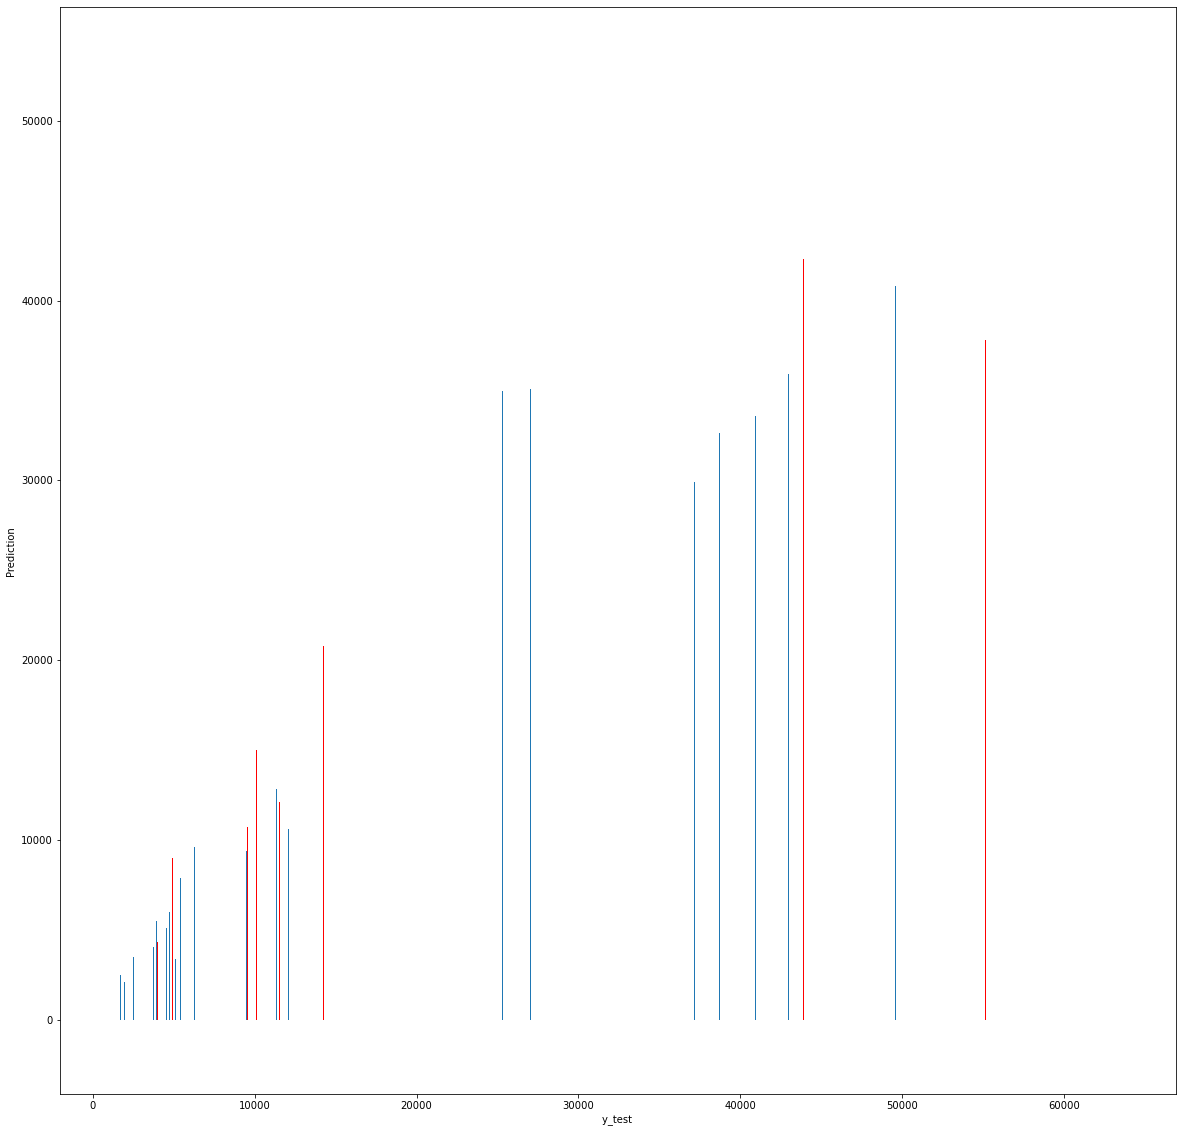

In [219]:
plt.figure(figsize=(20,20))
plt.bar(y_test,y_test_pred,color='red')
plt.bar(y_train,y_train_pred,linestyle='--',)
plt.xlabel("y_test ")
plt.ylabel("Prediction ")

In [223]:
input_data = (56,1,39.82,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array.shape)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped.shape)
prediction = classifier.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

(6,)
(1, 6)
[11079.4814875]
The insurance cost is USD  11079.481487500003


C:\Users\Raj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [221]:
input_data = (56,1,39.82,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[14700.70953716]
The insurance cost is USD  14700.709537159668


C:\Users\Raj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# BY THE ABOVE PREDICTION WE CAN KNOW THAT CLASSIFIER IS GIVING A QUIET CLOSE PREDICTION 
# THEN REGRESSOR. 

# CLASSIFIER  IS GOOD IN THIS CASE.

